In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
data = pd.read_csv("iris.csv")
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = data.drop(columns="target")
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)
print(X_train.shape)
X_test.shape


(112, 4)


(38, 4)

# fit

<br>

In [ ]:
dt = make_pipeline(
    KNNImputer(), SelectKBest(), StandardScaler(), DecisionTreeClassifier()
)  # StandardScaler().fit_transform(X_train, y_train) -> DecisionTreeClassifier().fit(X_train, y_train)

params = {
    "decisiontreeclassifier__max_depth": [1, 2, 3, 4],
    "decisiontreeclassifier__criterion": ["gini", "entropy"],
    "selectkbest__k": [1, 2, 3, 4],
}

grid = GridSearchCV(dt, param_grid=params, verbose=1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('selectkbest', SelectKBest()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4],
                         'selectkbest__k': [1, 2, 3, 4]},
             verbose=1)

In [6]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031541,0.009180,0.014355,0.015610,gini,1,1,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
1,0.058901,0.038663,0.015930,0.008296,gini,1,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
2,0.026845,0.009447,0.008605,0.002342,gini,1,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
3,0.021581,0.006762,0.007223,0.003346,gini,1,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
4,0.018964,0.000681,0.007290,0.000396,gini,2,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
5,0.009699,0.002953,0.004448,0.001292,gini,2,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
6,0.017979,0.004512,0.006006,0.001790,gini,2,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
7,0.022058,0.004113,0.010579,0.002056,gini,2,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
8,0.019650,0.004677,0.007530,0.002318,gini,3,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
9,0.010264,0.002659,0.004402,0.000798,gini,3,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.956522,0.863636,1.000000,0.818182,0.918972,0.067240,6


In [ ]:
print(grid.best_params_)
tree = grid.best_estimator_


{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'selectkbest__k': 2}


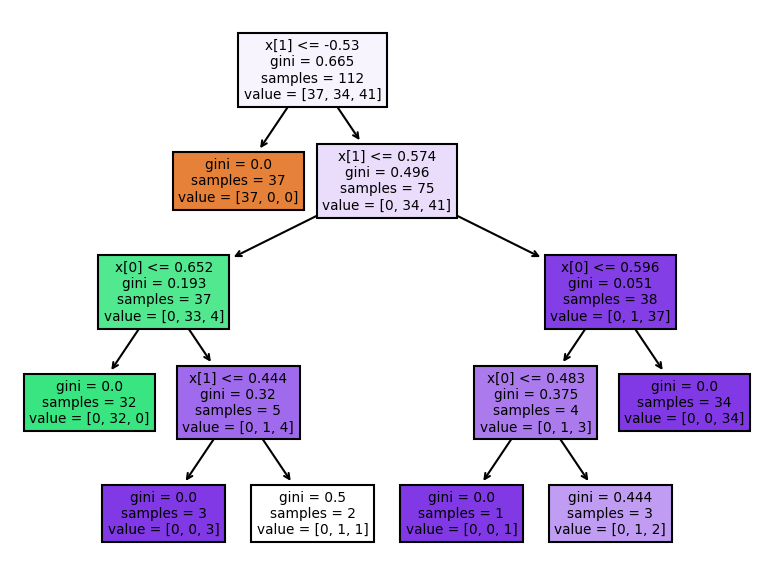

In [ ]:
plt.figure(dpi=150)
plot_tree(tree[3], filled=True)
plt.savefig("dt.png")


In [ ]:
y_pred = tree.predict(
    X_test
)  # StandardScaler().transform(X_test) -> DecisionTreeClassifier().predict(X_test)
y_pred


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0], dtype=int64)

In [10]:
accuracy_score(y_test, y_pred)

0.9736842105263158